#### NCSU GIS 714: Geospatial Computation and Simulations

## Spatio-temporal data handling and visualization in GRASS GIS: Part 1

Contents:
* Quick introduction to GRASS GIS and GRASS Temporal Framework
* Climate data analysis: analyze and visualize North Carolina temperature and precipitation time series

Additional Resources:
* [GRASS GIS Overview and Manual](https://grass.osgeo.org/grass-stable/manuals/index.html)
* [GRASS book](http://www.grassbook.org/)

#### Data:
* location NC_spm_temporal workshop
    * mapset climate_2000_2012: temperature and precipitation series for the whole North Carolina [1]
    * mapset NagsHead_series: elevation data time series, derived from lidar data
    * mapset centennial: DEM of part of Centennial campus, NC State University, derived from lidar data

#### Terminology:
* map in GRASS describes a spatial phenomenon, map is stored in GRASS database, it can be raster, vector, or 3D raster (other GIS systems often call this a layer)
* 3D raster is a three dimensional raster, alternative names include voxel, voxel model and volume
* spatio-temporal dataset in GRASS is a set of GRASS maps registered in GRASS temporal database
* GRASS module is one function, procedure or algorithm, it can be also referred as command especially when also all parameters are given (other systems use also terms tool and program), module can be invoked from GUI, Python or system command line

## Climate Data Analysis

### Start GRASS GIS

Start GRASS with location NC_spm_temporal_workshop and mapset climate_2000_2012.

In [1]:
# import subprocess
import sys
import json
import matplotlib.pyplot as plt
from datetime import datetime
"""
# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
# grass_call = "grass80"
# shell_setting = True
# FOR MAC/LINUX
grass_call = "grass"
shell_setting = False

sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=shell_setting).strip()
)

"""

# Configuration on my laptop
sys.path.append('/Applications/GRASS-8.4.app/Contents/Resources/etc/python')


# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("../data", "NC_spm_temporal_workshop", "climate_2000_2012")

Set computational region to the elevation raster.

In [2]:
gs.run_command("g.region", raster="elev_state_500m")

First, we list available raster maps and display the first temperature and precipitation maps from the series to make ourselves familiar with the data. Hide or clear the output when you're done - it's quite long!

In [3]:
print("All rasters in climate_2000_2012 and PERMANENT mapsets:")
print(gs.read_command("g.list", type="raster"))

All rasters in climate_2000_2012 and PERMANENT mapsets:
2000_01_precip
2000_01_tempmean
2000_02_precip
2000_02_tempmean
2000_03_precip
2000_03_tempmean
2000_04_precip
2000_04_tempmean
2000_05_precip
2000_05_tempmean
2000_06_precip
2000_06_tempmean
2000_07_precip
2000_07_tempmean
2000_08_precip
2000_08_tempmean
2000_09_precip
2000_09_tempmean
2000_10_precip
2000_10_tempmean
2000_11_precip
2000_11_tempmean
2000_12_precip
2000_12_tempmean
2001_01_precip
2001_01_tempmean
2001_02_precip
2001_02_tempmean
2001_03_precip
2001_03_tempmean
2001_04_precip
2001_04_tempmean
2001_05_precip
2001_05_tempmean
2001_06_precip
2001_06_tempmean
2001_07_precip
2001_07_tempmean
2001_08_precip
2001_08_tempmean
2001_09_precip
2001_09_tempmean
2001_10_precip
2001_10_tempmean
2001_11_precip
2001_11_tempmean
2001_12_precip
2001_12_tempmean
2002_01_precip
2002_01_tempmean
2002_02_precip
2002_02_tempmean
2002_03_precip
2002_03_tempmean
2002_04_precip
2002_04_tempmean
2002_05_precip
2002_05_tempmean
2002_06_precip
2

In [7]:
print("All rasters ending in 'tempmean':")
print(gs.read_command("g.list", type="raster", pattern="*tempmean"))

All rasters ending in 'tempmean':
2000_01_tempmean
2000_02_tempmean
2000_03_tempmean
2000_04_tempmean
2000_05_tempmean
2000_06_tempmean
2000_07_tempmean
2000_08_tempmean
2000_09_tempmean
2000_10_tempmean
2000_11_tempmean
2000_12_tempmean
2001_01_tempmean
2001_02_tempmean
2001_03_tempmean
2001_04_tempmean
2001_05_tempmean
2001_06_tempmean
2001_07_tempmean
2001_08_tempmean
2001_09_tempmean
2001_10_tempmean
2001_11_tempmean
2001_12_tempmean
2002_01_tempmean
2002_02_tempmean
2002_03_tempmean
2002_04_tempmean
2002_05_tempmean
2002_06_tempmean
2002_07_tempmean
2002_08_tempmean
2002_09_tempmean
2002_10_tempmean
2002_11_tempmean
2002_12_tempmean
2003_01_tempmean
2003_02_tempmean
2003_03_tempmean
2003_04_tempmean
2003_05_tempmean
2003_06_tempmean
2003_07_tempmean
2003_08_tempmean
2003_09_tempmean
2003_10_tempmean
2003_11_tempmean
2003_12_tempmean
2004_01_tempmean
2004_02_tempmean
2004_03_tempmean
2004_04_tempmean
2004_05_tempmean
2004_06_tempmean
2004_07_tempmean
2004_08_tempmean
2004_09_tempme

In [4]:
print("All rasters ending in 'precip':")
print(gs.read_command("g.list", type="raster", pattern="*precip"))

All rasters ending in 'precip':
2000_01_precip
2000_02_precip
2000_03_precip
2000_04_precip
2000_05_precip
2000_06_precip
2000_07_precip
2000_08_precip
2000_09_precip
2000_10_precip
2000_11_precip
2000_12_precip
2001_01_precip
2001_02_precip
2001_03_precip
2001_04_precip
2001_05_precip
2001_06_precip
2001_07_precip
2001_08_precip
2001_09_precip
2001_10_precip
2001_11_precip
2001_12_precip
2002_01_precip
2002_02_precip
2002_03_precip
2002_04_precip
2002_05_precip
2002_06_precip
2002_07_precip
2002_08_precip
2002_09_precip
2002_10_precip
2002_11_precip
2002_12_precip
2003_01_precip
2003_02_precip
2003_03_precip
2003_04_precip
2003_05_precip
2003_06_precip
2003_07_precip
2003_08_precip
2003_09_precip
2003_10_precip
2003_11_precip
2003_12_precip
2004_01_precip
2004_02_precip
2004_03_precip
2004_04_precip
2004_05_precip
2004_06_precip
2004_07_precip
2004_08_precip
2004_09_precip
2004_10_precip
2004_11_precip
2004_12_precip
2005_01_precip
2005_02_precip
2005_03_precip
2005_04_precip
2005_05_

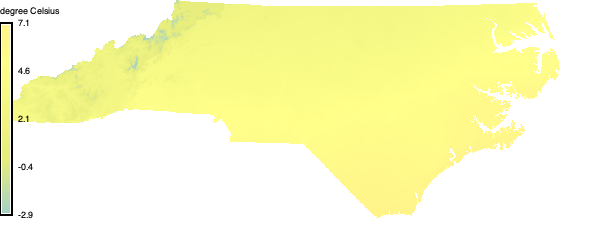

In [5]:
# Display first temperature map
img = gj.Map(use_region=True)
img.d_rast(map="2000_01_tempmean")
img.d_legend(raster="2000_01_tempmean", at=(10, 90, 0, 2))
# Display map
img.show()

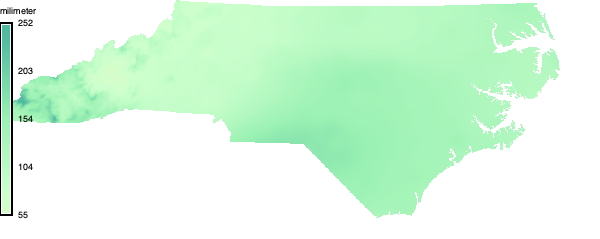

In [6]:
# Display first precipitation map
img = gj.Map(use_region=True)
img.d_rast(map="2000_01_precip")
img.d_legend(raster="2000_01_precip", at=(10, 90, 0, 2))
# Display map
img.show()

### Make Space-Time Datasets

To better handle the long time series of maps, we create temporal datasets which serve as containers for the time series and we will further manipulate them instead of the individual maps. First, we create empty datasets of type strds (space-time raster dataset). Note, that we use absolute time.

In [7]:
gs.run_command(
    "t.create",
    output="tempmean",
    type="strds",
    temporaltype="absolute",
    title="Average temperature",
    description="Monthly temperature average in NC [deg C]",
)

gs.run_command(
    "t.create",
    output="precip_sum",
    type="strds",
    temporaltype="absolute",
    title="Preciptation",
    description="Monthly precipitation sums in NC [mm]",
)

Now we register raster maps into yet empty space-time raster datasets with start date 2000-01-01 and interval time with increment 1 month. We use [g.list](https://grass.osgeo.org/grass80/manuals/g.list.html) again to list separately temperature and precipitation maps. Note that g.list lists maps alphabetically which in this case orders the maps chronologically which is what we need.

In [8]:
# Create list of rasters to be registered to empty space time datasets
tempmean_list = gs.read_command(
    "g.list", type="raster", pattern="*tempmean", separator="comma"
).strip()

precip_list = gs.read_command(
    "g.list", type="raster", pattern="*precip", separator="comma"
).strip()

# Register the rasters to the space time dataset created above
gs.run_command(
    "t.register",
    input="tempmean",
    type="raster",
    start="2000-01-01",
    increment="1 months",
    maps=tempmean_list,
    flags="i",
)

gs.run_command(
    "t.register",
    input="precip_sum",
    type="raster",
    start="2000-01-01",
    increment="1 months",
    maps=precip_list,
    flags="i",
)

In [9]:
tempmean_list

'2000_01_tempmean,2000_02_tempmean,2000_03_tempmean,2000_04_tempmean,2000_05_tempmean,2000_06_tempmean,2000_07_tempmean,2000_08_tempmean,2000_09_tempmean,2000_10_tempmean,2000_11_tempmean,2000_12_tempmean,2001_01_tempmean,2001_02_tempmean,2001_03_tempmean,2001_04_tempmean,2001_05_tempmean,2001_06_tempmean,2001_07_tempmean,2001_08_tempmean,2001_09_tempmean,2001_10_tempmean,2001_11_tempmean,2001_12_tempmean,2002_01_tempmean,2002_02_tempmean,2002_03_tempmean,2002_04_tempmean,2002_05_tempmean,2002_06_tempmean,2002_07_tempmean,2002_08_tempmean,2002_09_tempmean,2002_10_tempmean,2002_11_tempmean,2002_12_tempmean,2003_01_tempmean,2003_02_tempmean,2003_03_tempmean,2003_04_tempmean,2003_05_tempmean,2003_06_tempmean,2003_07_tempmean,2003_08_tempmean,2003_09_tempmean,2003_10_tempmean,2003_11_tempmean,2003_12_tempmean,2004_01_tempmean,2004_02_tempmean,2004_03_tempmean,2004_04_tempmean,2004_05_tempmean,2004_06_tempmean,2004_07_tempmean,2004_08_tempmean,2004_09_tempmean,2004_10_tempmean,2004_11_tempm

In [11]:
precip_list

'2000_01_precip,2000_02_precip,2000_03_precip,2000_04_precip,2000_05_precip,2000_06_precip,2000_07_precip,2000_08_precip,2000_09_precip,2000_10_precip,2000_11_precip,2000_12_precip,2001_01_precip,2001_02_precip,2001_03_precip,2001_04_precip,2001_05_precip,2001_06_precip,2001_07_precip,2001_08_precip,2001_09_precip,2001_10_precip,2001_11_precip,2001_12_precip,2002_01_precip,2002_02_precip,2002_03_precip,2002_04_precip,2002_05_precip,2002_06_precip,2002_07_precip,2002_08_precip,2002_09_precip,2002_10_precip,2002_11_precip,2002_12_precip,2003_01_precip,2003_02_precip,2003_03_precip,2003_04_precip,2003_05_precip,2003_06_precip,2003_07_precip,2003_08_precip,2003_09_precip,2003_10_precip,2003_11_precip,2003_12_precip,2004_01_precip,2004_02_precip,2004_03_precip,2004_04_precip,2004_05_precip,2004_06_precip,2004_07_precip,2004_08_precip,2004_09_precip,2004_10_precip,2004_11_precip,2004_12_precip,2005_01_precip,2005_02_precip,2005_03_precip,2005_04_precip,2005_05_precip,2005_06_precip,2005_07_p

### Dataset Animation and Exploration

Extract a small subset for visualization and exploration.

In [12]:
gs.run_command(
    "t.rast.extract",
    input="precip_sum",
    output="precip_sum_2010",
    where="start_time >= '2010-01-01' and start_time < '2011-01-01'",
)

gs.run_command(
    't.rast.extract',
    input='tempmean',
    output='tempmean_2010',
    where="start_time >= '2010-01-01' and start_time < '2011-01-01'",
)

Set the color table for all rasters in the space time raster dataset

In [13]:
gs.run_command("t.rast.colors", input="precip_sum_2010", color="precipitation_monthly")

Create and display animation. The `TimeSeriesMap` class contains visualization functions for GRASS space time dataset (strds or stvds) with either a time slider using `show` or by exporting as a GIF with `save`.

In [14]:
precip_map = gj.TimeSeriesMap(use_region=True)
precip_map.add_raster_series("precip_sum_2010")
precip_map.d_legend(color="black", at=(10, 90, 0, 2)) #Add legend
precip_map.d_vect(map="boundary_county", fill_color="none")
precip_map.d_barscale()

In [19]:
precip_map.show()

We can also get information about the dataset with [t.info](https://grass.osgeo.org/grass80/manuals/t.info.html).

In [15]:
print(gs.read_command("t.info", input="precip_sum_2010"))

 +-------------------- Space Time Raster Dataset -----------------------------+
 |                                                                            |
 +-------------------- Basic information -------------------------------------+
 | Id: ........................ precip_sum_2010@climate_2000_2012
 | Name: ...................... precip_sum_2010
 | Mapset: .................... climate_2000_2012
 | Creator: ................... asumi
 | Temporal type: ............. absolute
 | Creation time: ............. 2025-01-21 22:00:49.683500
 | Modification time:.......... 2025-01-21 22:00:49.695644
 | Semantic type:.............. mean
 +-------------------- Absolute time -----------------------------------------+
 | Start time:................. 2010-01-01 00:00:00
 | End time:................... 2011-01-01 00:00:00
 | Granularity:................ 1 month
 | Temporal type of maps:...... interval
 +-------------------- Spatial extent ----------------------------------------+
 | North:........

Now we look at some other options to explore data using again [t.rast.list](https://grass.osgeo.org/grass80/manuals/t.rast.list.html). We can for example choose which columns to print, and the order of records. In this case, we print the time and monthly minimum of precipitation to get the information which months in 2010 had the highest maximum values. The default separator (pipe) can be changed with separator option.

In [16]:
print(gs.read_command("t.rast.list", input="precip_sum_2010", columns="start_time,max", order="max", sep="tab"))

start_time	max
2010-03-01 00:00:00	185.205301
2010-10-01 00:00:00	193.535038
2010-04-01 00:00:00	195.058733
2010-06-01 00:00:00	200.733653
2010-07-01 00:00:00	204.27181
2010-12-01 00:00:00	213.491789
2010-08-01 00:00:00	216.814503
2010-05-01 00:00:00	222.754572
2010-02-01 00:00:00	230.012002
2010-11-01 00:00:00	240.428106
2010-01-01 00:00:00	294.089268
2010-09-01 00:00:00	436.309366



Here, we compute univariate statistics using [t.rast.univar](https://grass.osgeo.org/grass80/manuals/t.rast.univar.html) with temporal 'where' option to limit output to last 3 months of the year 2010.

In [17]:
print(gs.read_command("t.rast.univar", input="tempmean_2010", where="start_time > '2010-09-30'"))

id|semantic_label|start|end|mean|min|max|mean_of_abs|stddev|variance|coeff_var|sum|null_cells|cells|non_null_cells
2010_10_tempmean@climate_2000_2012||2010-10-01 00:00:00|2010-11-01 00:00:00|16.2275459748922|9.80648888481988|19.2237726847331|16.2275459748922|1.83784116074704|3.37766013213602|11.3254410962114|8233321.31864314|615215|507367|507367
2010_11_tempmean@climate_2000_2012||2010-11-01 00:00:00|2010-12-01 00:00:00|10.0550104277932|3.83957968817817|13.2355732387967|10.0550104277932|1.49157983140198|2.22481039344515|14.8341947739714|5101580.47571814|615215|507367|507367
2010_12_tempmean@climate_2000_2012||2010-12-01 00:00:00|2011-01-01 00:00:00|0.929180131463252|-6.46433724297418|4.24769083658854|1.58153627012032|1.56125262006063|2.43750974364618|168.024752918684|471435.335760116|615215|507367|507367



#### *Question 1*

Extract precipitation for the time period between 1.1.2004 and 1.1.2005 and compare the spatial distribution of rainfall, focusing on extreme events
during this period and 1.1.2010-1.1.2011. Can you identify the time and location of an extreme event in 2004?

In [20]:
#### Your Answer Here
gs.run_command(
    "t.rast.extract",
    input="precip_sum",
    output="precip_sum_2004",
    where="start_time >= '2004-01-01' and start_time < '2005-01-01'",
)


In [21]:
print(gs.read_command("t.rast.list", input="precip_sum_2010", columns="start_time,max", order="max", sep="tab"))

start_time	max
2010-03-01 00:00:00	185.205301
2010-10-01 00:00:00	193.535038
2010-04-01 00:00:00	195.058733
2010-06-01 00:00:00	200.733653
2010-07-01 00:00:00	204.27181
2010-12-01 00:00:00	213.491789
2010-08-01 00:00:00	216.814503
2010-05-01 00:00:00	222.754572
2010-02-01 00:00:00	230.012002
2010-11-01 00:00:00	240.428106
2010-01-01 00:00:00	294.089268
2010-09-01 00:00:00	436.309366



In [22]:
print(gs.read_command("t.rast.list", input="precip_sum_2004", columns="start_time,max", order="max", sep="tab"))

start_time	max
2004-10-01 00:00:00	135.646153
2004-04-01 00:00:00	176.775317
2004-03-01 00:00:00	180.219196
2004-01-01 00:00:00	195.723857
2004-05-01 00:00:00	213.837989
2004-02-01 00:00:00	228.322909
2004-07-01 00:00:00	258.243297
2004-12-01 00:00:00	259.931687
2004-06-01 00:00:00	267.028832
2004-08-01 00:00:00	309.749165
2004-11-01 00:00:00	334.518632
2004-09-01 00:00:00	774.91176



Finally we remove these two extracted spatio-temporal datasets. Note: in this case we remove just the "container", not the actual maps, as we can see from the output of g.list. Module t.remove enables to remove the actual data, too, using appropriate flags, but we will not do that now, since we still need the data.

In [23]:
gs.run_command("t.remove", inputs="tempmean_2010,precip_sum_2010", flags="f")
print(gs.read_command("t.list", type="strds"))

precip_sum@climate_2000_2012
precip_sum_2004@climate_2000_2012
tempmean@climate_2000_2012



In [24]:
print(gs.read_command("g.list", type="raster", pattern="2010*tempmean"))

2010_01_tempmean
2010_02_tempmean
2010_03_tempmean
2010_04_tempmean
2010_05_tempmean
2010_06_tempmean
2010_07_tempmean
2010_08_tempmean
2010_09_tempmean
2010_10_tempmean
2010_11_tempmean
2010_12_tempmean



#### *Question 2*
Remove the 2004-2005 precipitation spatio-temporal datasets that you created in Question 2.

In [26]:
#### Your Answer Here
gs.run_command("t.remove", inputs="precip_sum_2004", flags="f")
print(gs.read_command("t.list", type="strds"))

precip_sum@climate_2000_2012
tempmean@climate_2000_2012



### Temporal Aggregation

We will start by computing average temperature for each season of the year (we use term aggregation). We specify 'where' option to start aggregating the first of March 2000 because winter season 2000 is not complete.

In [27]:
gs.run_command('t.rast.aggregate', input='tempmean',
                output='tempmean_seasonal', base='tempmean_seasonal',
                granularity="3 months", method='average',
                where="start_time >= '2000-03-01' and start_time < '2012-11-01'")

Extract summer periods and convert to degrees Fahrenheit. SQLite function strftime('%m', start_time) returns the month of the map start timestamp. Note that strftime function is not a GRASS function. It is specific to SQLite (temporal database) backend, you need to use something different if you are using PostgreSQL backend. Using nprocs=4 we are telling t.rast.extract to use 4 processes which will be distributed to 4 processor cores if available.

In [28]:
gs.run_command('t.rast.extract', input='tempmean_seasonal',
                where="strftime('%m', start_time)='06'",
                expression="(tempmean_seasonal  * 9.0/5.0) + 32",
                output='tempmean_F_summer', base='tempmean_F_summer',
                nprocs='4')

Now we will display an animation of summer temperatures in North Carolina and we will overlay static vector map of counties' boundaries. Before we display the maps, we set color table of the entire time series.

In [29]:
gs.run_command("t.rast.colors", input="tempmean_F_summer", color="fahrenheit")

In [30]:
summer_map = gj.TimeSeriesMap(use_region=True)
summer_map.add_raster_series("tempmean_F_summer", fill_gaps=True)
summer_map.d_legend(color="black", at=(10, 90, 0, 2))
summer_map.d_vect(map="boundary_county", fill_color="none")
summer_map.show()

Let's do the same aggregation with precipitation dataset in a different way. Aggregate data using time intervals of tempmean_F_summer. Convert millimeters to inches. The result will be mean of summer monthly precipitation in inches.

In [31]:
gs.run_command('t.rast.aggregate.ds', input='precip_sum',
                sample='tempmean_F_summer', output='precip_summer',
                base='precip_summer', method='average')
gs.run_command('t.rast.mapcalc', inputs='precip_summer',
                expression="precip_summer / 25.4",
                output='precip_inch_summer', base='precip_inch_summer',
                nprocs='4')


### Is precipitation and temperature correlated?

We will use [r.regression.series](https://grass.osgeo.org/grass80/manuals/t.rast.univar.html), which is a GRASS addon. Use g.extension to download it from GRASS Addons:

In [32]:
gs.run_command("g.extension", extension="r.regression.series")

Your branch is up to date with 'origin/grass8'.


Now we determine the correlation. Note that r.regression.series does not accept spatio-temporal datasets yet, just individual maps:

In [33]:
# Get list of rasters
temp_list = gs.read_command("g.list", type="raster", pattern="tempmean_F_summer*", separator="comma").strip()
precip_list = gs.read_command("g.list", type="raster", pattern="precip_inch_summer*", separator="comma").strip()

gs.run_command("r.regression.series", xseries=temp_list, yseries=precip_list, output="corr", method="corcoef")

Set color table of corr raster map to differences color table.

In [34]:
gs.run_command("r.colors", map="corr", color="differences")

Now we can explore the map corr showing mostly negative spatial correlation between temperature and precipitation during summer.

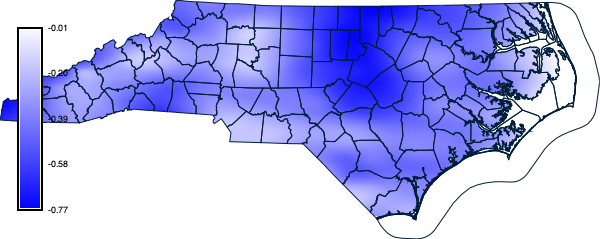

In [35]:
img = gj.Map(use_region=True)
img.d_rast(map="corr")
img.d_vect(map="boundary_county", fill_color="none")
img.d_legend(raster="corr")
img.show()

### Plot min/max values of summer temperature and precipitation

In [36]:
temperatures = json.loads(gs.read_command("t.rast.list", input="tempmean_F_summer", columns="start_time,min,max", format="json"))

start_times=[]
mins=[]
maxs=[]

for item in temperatures["data"]:
    start_times.append(datetime.strptime(item["start_time"], '%Y-%m-%d %H:%M:%S'))
    mins.append(item["min"])
    maxs.append(item["max"])

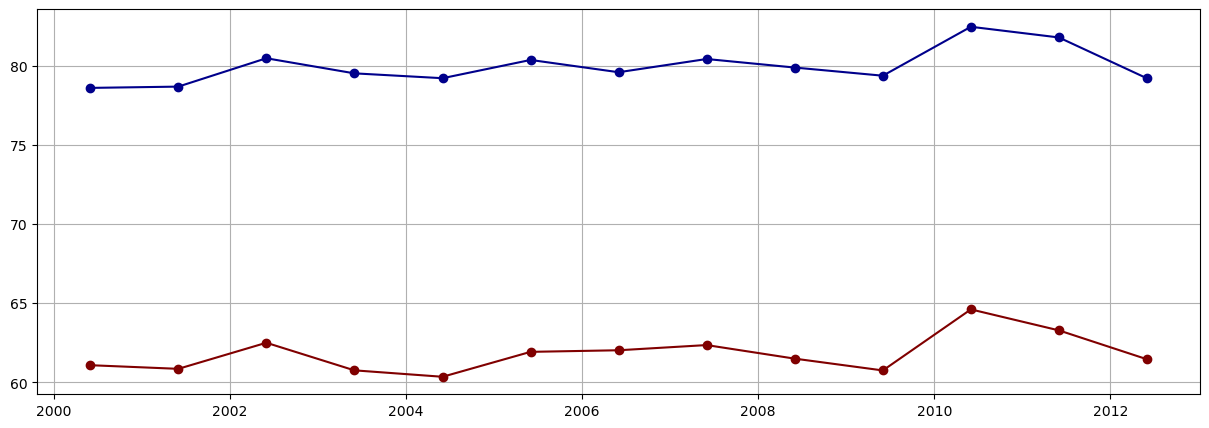

In [37]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.grid()
plt.plot(start_times, mins, color='maroon', marker='o', label="Minimum")
plt.plot(start_times, maxs, color='darkblue', marker='o', label="Maximum")
plt.show()

### Plot temperatures in Raleigh and Ashville

Now we will plot temperatures in Raleigh and Ashville. You can find vector map towns in mapset PERMANENT. It contains 2 points representing Raleigh and Ashville. Using t.vect.observe.strds, we create a space-time vector dataset with values of summer temperature in those two locations stored in the attribute tables:

In [38]:
gs.run_command('t.vect.observe.strds', input='towns',
                strds='tempmean_F_summer', output='towns_tempmean_summer',
                vector_output='towns_summer', column='tempmean')

In [39]:
raleigh = gs.read_command("t.vect.db.select", input="towns_tempmean_summer", columns="tempmean", separator="comma", where="cat = 1")
asheville = gs.read_command("t.vect.db.select", input="towns_tempmean_summer", columns="tempmean", separator="comma", where="cat = 2")

Parse strings and lot the values using matplotlib.

In [40]:
def parse_csv_string(string):
    rows = string.split("\n")[1:-1] #ignore the headers and empty last row

    start_times=[]
    end_times=[]
    tempmeans=[]

    for row in rows:
        row = row.split(",")
        start_times.append(datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S'))
        end_times.append(row[1])
        tempmeans.append(float(row[2]))
    return start_times, end_times, tempmeans

In [41]:
ral_start_times, ral_end_times, ral_tempmeans = parse_csv_string(raleigh)
ash_start_times, ash_end_times, ash_tempmeans = parse_csv_string(asheville)

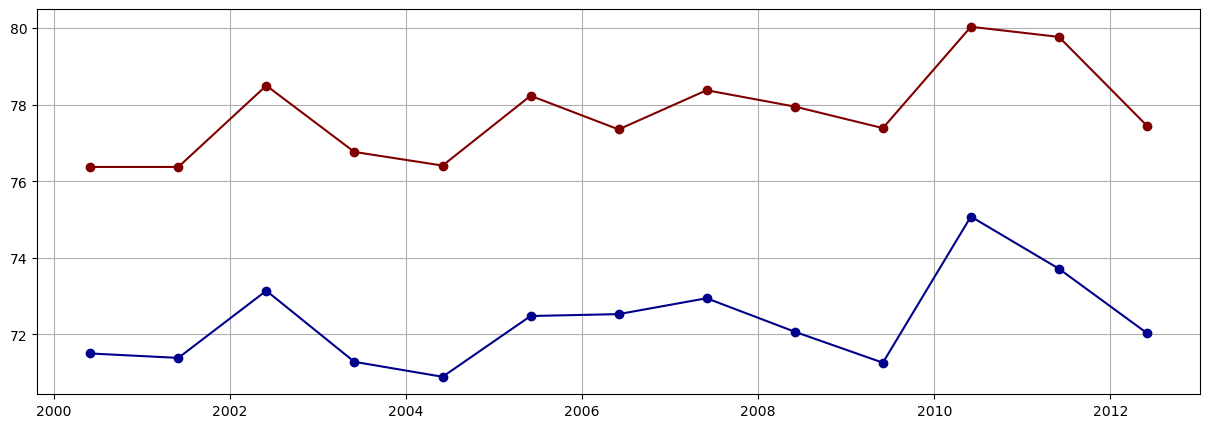

In [42]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.grid()
plt.plot(ral_start_times, ral_tempmeans, color='maroon', marker='o', label="Raleigh")
plt.plot(ash_start_times, ash_tempmeans, color='darkblue', marker='o', label="Asheville")
plt.show()

### References

[1] State Climate Office of North Carolina, http://convection.meas.ncsu.edu:8080/thredds/catalog/catalog.html


### Additional Information
* [Website](https://github.com/ncsu-geoforall-lab/geospatial-simulations-course)
    
* [Computing Help](https://help.ncsu.edu/)
    
* [GIST Home](https://geospatial.ncsu.edu/)
    
* [Disclaimer](https://www.ncsu.edu/policies/prr-disclaimer.php)
    
* [Accessibility](https://oit.ncsu.edu/itaccess)

* License: 2018 [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/)
  
* [NCSU GeoForAll Lab](https://geospatial.ncsu.edu/geoforall/)